In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
initial_city = pd.read_csv(city_data_to_load)
initial_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df_final = pd.merge(initial_ride, initial_city, on = 'city')
# Display the data table for preview

# find unique city and put in the list
unique_city = df_final['city'].unique().tolist()
# get the total number of the data
total = df_final['city'].count()
# use a for loop to find all the index that have the first unique city value
j = 0
index_list = []
for i in range(total):
    if df_final.loc[i,'city'] == unique_city[j]:
        index_list.append(i)
        if j == len(unique_city) - 1:
            break
        j += 1
# remake the dataframe to have the first unique city name
first_answer = df_final.iloc[index_list,:].reset_index()
# reset index and delete the the old index
first_answer = first_answer.drop(columns = 'index')
first_answer.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


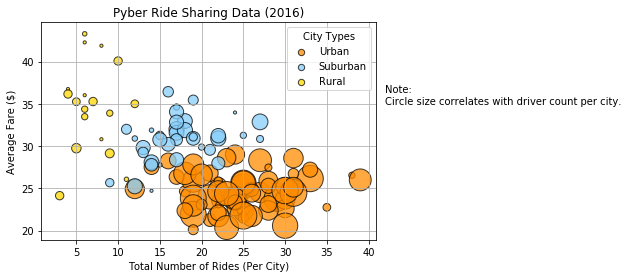

In [2]:
# Obtain the x and y coordinates for each of the three city types
# remake 3 different dataframe to have the different type
df_urban = df_final.loc[df_final['type'] == 'Urban', :]
df_suburban = df_final.loc[df_final['type'] == 'Suburban', :]
df_rural = df_final.loc[df_final['type'] == 'Rural', :]
# Build the scatter plots for each city types
# Incorporate the other graph properties
# remake a series with city and target value and sort the city name to have the same order and make it to be the list
# to inside of pandas.scatter
# urban data collection
drive_urban = initial_city.loc[initial_city['type'] == 'Urban', ['city','driver_count']]
drive_urban_list = drive_urban.sort_values('city')['driver_count'].tolist()
group_urban = df_urban.groupby('city')
average_urban = group_urban['fare'].mean()
ride_urban_list = df_urban['city'].value_counts().sort_index().tolist()
average_urban_list = average_urban.sort_index().tolist()

# suburban data collection
drive_suburban = initial_city.loc[initial_city['type'] == 'Suburban', ['city','driver_count']]
drive_suburban_list = drive_suburban.sort_values('city')['driver_count'].tolist()
group_suburban = df_suburban.groupby('city')
average_suburban = group_suburban['fare'].mean()
ride_suburban_list = df_suburban['city'].value_counts().sort_index().tolist()
average_suburban_list = average_suburban.sort_index().tolist()

# suburban data collection
drive_rural = initial_city.loc[initial_city['type'] == 'Rural', ['city','driver_count']]
drive_rural_list = drive_rural.sort_values('city')['driver_count'].tolist()
group_rural = df_rural.groupby('city')
average_rural = group_rural['fare'].mean()
ride_rural_list = df_rural['city'].value_counts().sort_index().tolist()
average_rural_list = average_rural.sort_index().tolist()

# motify the size of the data for a better visibility 
times = 10
for i in range(len(drive_urban_list)):
    drive_urban_list[i] *= times
for i in range(len(drive_suburban_list)):
    drive_suburban_list[i] *= times
for i in range(len(drive_rural_list)):
    drive_rural_list[i] *= times
plt.scatter(ride_urban_list, average_urban_list, marker="o", facecolors="darkorange", 
            s = drive_urban_list, edgecolors = "black", alpha = 0.75, label = 'Urban')
plt.scatter(ride_suburban_list, average_suburban_list, marker="o", facecolors="lightskyblue", 
            s = drive_suburban_list, edgecolors = "black", alpha = 0.75, label = 'Suburban')
plt.scatter(ride_rural_list, average_rural_list, marker="o", facecolors="gold", 
            s = drive_rural_list, edgecolors = "black", alpha = 0.75, label = 'Rural')
plt.grid()
# Create a legend
legand = plt.legend(title = 'City Types')
# Incorporate a text label regarding circle size
for i in range(3):
    legand.legendHandles[i]._sizes = [40]
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.',
        horizontalalignment='left')
# Save Figure
plt.savefig('new_figure/Pyber_Ride_Sharing_Data.png', bbox_inches = 'tight')
# Show Figure
plt.show()

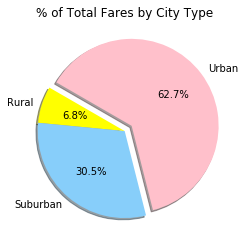

In [3]:
# Calculate Type Percents
group_type = df_final.groupby('type')
fares_group = group_type['fare'].sum()
pies_name = ['Rural', 'Suburban', 'Urban']
pie_value = fares_group.tolist()
pie_color = ['yellow', 'lightskyblue', 'pink']
pie_explode = (0,0,0.1)
# Build Pie Chart
plt.pie(pie_value, explode = pie_explode, labels = pies_name, colors = pie_color, 
        autopct = "%1.1f%%", startangle = 150, shadow = True)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('new_figure/Percent_of_Total_Fares.png', bbox_inches = 'tight')
# Show Figure
plt.show()

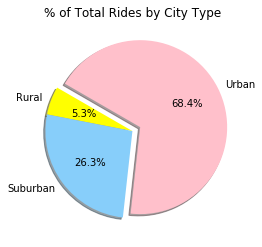

In [4]:
df_final.head()
# Calculate Ride Percents
ride_total = df_final['type'].value_counts().sort_index().tolist()
# Build Pie Chart
plt.pie(ride_total, explode = pie_explode, labels = pies_name, colors = pie_color, 
        autopct = "%1.1f%%", startangle = 150, shadow = True)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('new_figure/Total_of_Rides.png', bbox_inches = 'tight')
# Show Figure
plt.show()

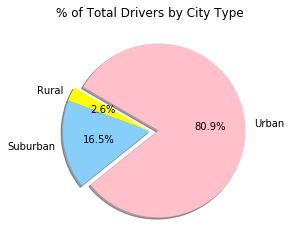

In [5]:
city_group = initial_city.groupby('type')
drive_total = city_group['driver_count'].sum().sort_index().tolist()
# Build Pie Chart
plt.pie(drive_total, explode = pie_explode, labels = pies_name, colors = pie_color, 
        autopct = "%1.1f%%", startangle = 150, shadow = True)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('new_figure/Total_of_Drivers_Fares.png', bbox_inches = 'tight')
# Show Figure
plt.show()